In [1]:
%matplotlib inline
%load_ext autoreload
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from matplotlib import rc
rc("font", family = "serif",size=20)
rc("figure",figsize=(9,6))
rc("figure",facecolor="white")
%config InlineBackend.figure_format = 'retina'

import cvxpy as cp
import numpy as np

%autoreload 2
from loss_and_reg import *

In [2]:
rc("font", family = "serif",size=20)
rc("figure",figsize=(9,6))
rc("figure",facecolor="white")

## Qs

Revaluating the same problem instead of creating it each time.

## Defining Classes of Loss and Regularizer

Taken from: https://github.com/powerscorinne/GLRM

In [3]:
# from numpy import ones, maximum, minimum, sign, floor, ceil


# # Abstract Loss class
# class Loss(object):
#     def __init__(self): return
#     def loss(self, A, U): raise NotImplementedError("Override me!")
#     def encode(self, A): return A # default
#     def decode(self, A): return A # default
#     def __str__(self): return "GLRM Loss: override me!"
#     def __call__(self, A, U): return self.loss(A, U)

# class QuadraticLoss(Loss):
#     def loss(self, A, U): return cp.sum_squares(cp.Constant(A) - U)/2.0
#     def __str__(self): return "quadratic loss"

# class HuberLoss(Loss):
#     a = 1.0 # XXX does the value of 'a' propagate if we update it?
#     def loss(self, A, U): return cp.sum(cp.huber(cp.Constant(A) - U, self.a))
#     def __str__(self): return "huber loss"

# class HingeLoss(Loss):
#     def loss(self, A, U): return cp.sum(cp.pos(ones(A.shape)-cp.multiply(cp.Constant(A), U)))
#     def decode(self, A): return sign(A) # return back to Boolean
#     def __str__(self): return "hinge loss"

# class OrdinalLoss(Loss):
#     def __init__(self, Amin,Amax):
#         """
#         input
#         -----
#         Amax : Integer
#             maximum value in A
#         Amin: Integer
#             minimum value in A
#         """
#         self.Amax, self.Amin = Amax,Amin
#     def loss(self, A, U):
#         return cp.sum(sum(cp.multiply(1*(b >= A),\
#                 cp.pos(U-b*ones(A.shape))) + cp.multiply(1*(b < A), \
#                 cp.pos(-U + (b+1)*ones(A.shape))) for b in range(int(self.Amin), int(self.Amax))))
#     def decode(self, A): return maximum(minimum(A.round(), self.Amax), self.Amin)
#     def __str__(self): return "ordinal loss"

    
# #===================== Regularizers===============================
    
# class Reg(object):
#     # shape indicates how quickly it grows: 0 [flat], 1 [linear], 2 [quadratic+]
#     def reg(self, X): raise NotImplementedError("Override me!")
#     def __init__(self, nu=1): self.nu = nu # XXX think of a better way to handle nu?
#     def __str__(self): return "GLRM Reg: override me!"
#     def __call__(self, X): return self.reg(X)

# class ZeroReg(Reg):
#     def reg(self, X): return 0
#     def __str__(self): return "zero reg"

# class LinearReg(Reg):
#     def reg(self, X): return self.nu*cp.norm(X)
#     def __str__(self): return "linear reg"

# class QuadraticReg(Reg):
#     def reg(self, X): return self.nu*cp.sum_squares(X)
#     def __str__(self): return "quadratic reg"

## load iris data

In [4]:
iris = datasets.load_iris()
sk_scaler = StandardScaler()
sk_scaler.fit(iris.data)
A = sk_scaler.transform(iris.data)
# A = StandardScaler().fit_transform(iris.data)

y = iris.target
cols = np.array(['tab:blue','tab:orange','tab:green'])[y]

## Do nonregularized PCA

0
1
done


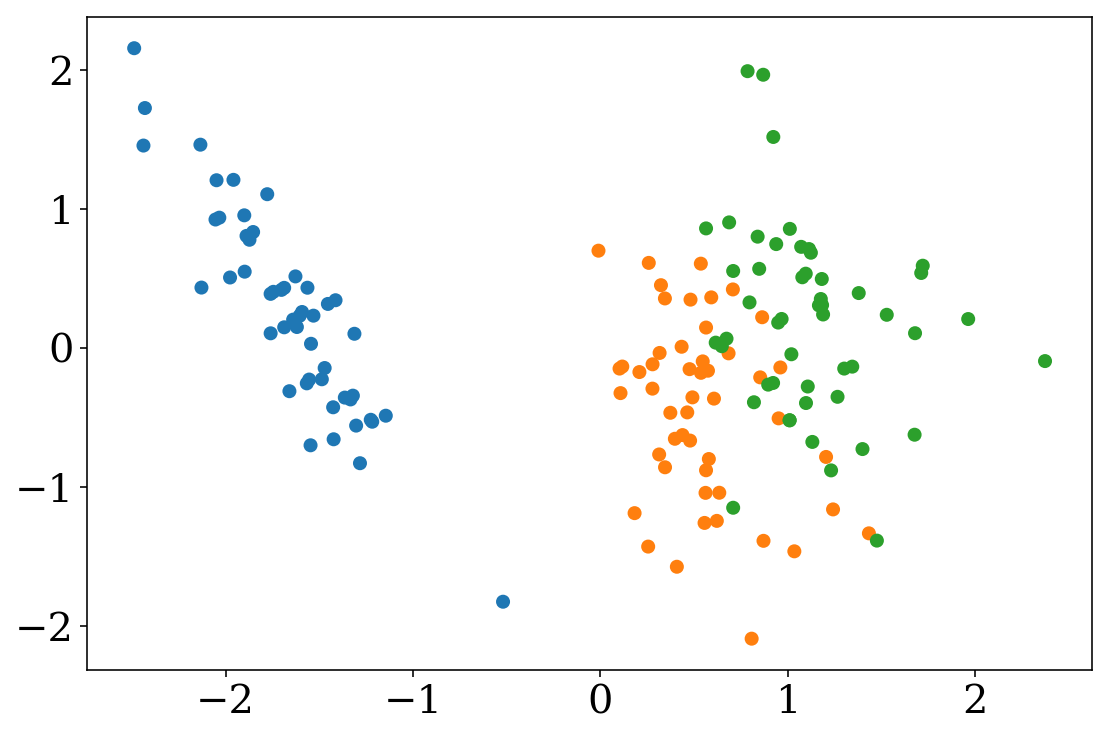

In [5]:
k = 2


m,n = A.shape
# A = np.random.randn(m, n)
Xp = cp.Parameter((m,k))
Yp = cp.Parameter((k,n))

Xv = cp.Variable((m,k))
Yv = cp.Variable((k,n))
X0 = np.random.rand(m,k)



#Random Intialization 
Xv.value = np.random.rand(m,k)
Xp.value = np.random.rand(m,k)

Yp.value = np.random.rand(k,n)
Yv.value = np.random.rand(k,n)

niter = 2
for i in range(niter):
    print(i)
    
    # do X
    objX = cp.Minimize(cp.sum_squares(A-Xv@Yp))
    probX = cp.Problem(objX)
    probX.solve(verbose=False)

    Xp.value = Xv.value
#     Yp = np.random.rand(k,n)
    # do Y
    objY = cp.Minimize(cp.sum_squares(A-Xp@Yv))
    probY = cp.Problem(objY)
    probY.solve()
    Yp.value = Yv.value
print("done")

X = Xp.value
plt.scatter(X[:,0],X[:,1],color=cols)

Not redefining the problem evey time

0
1
done


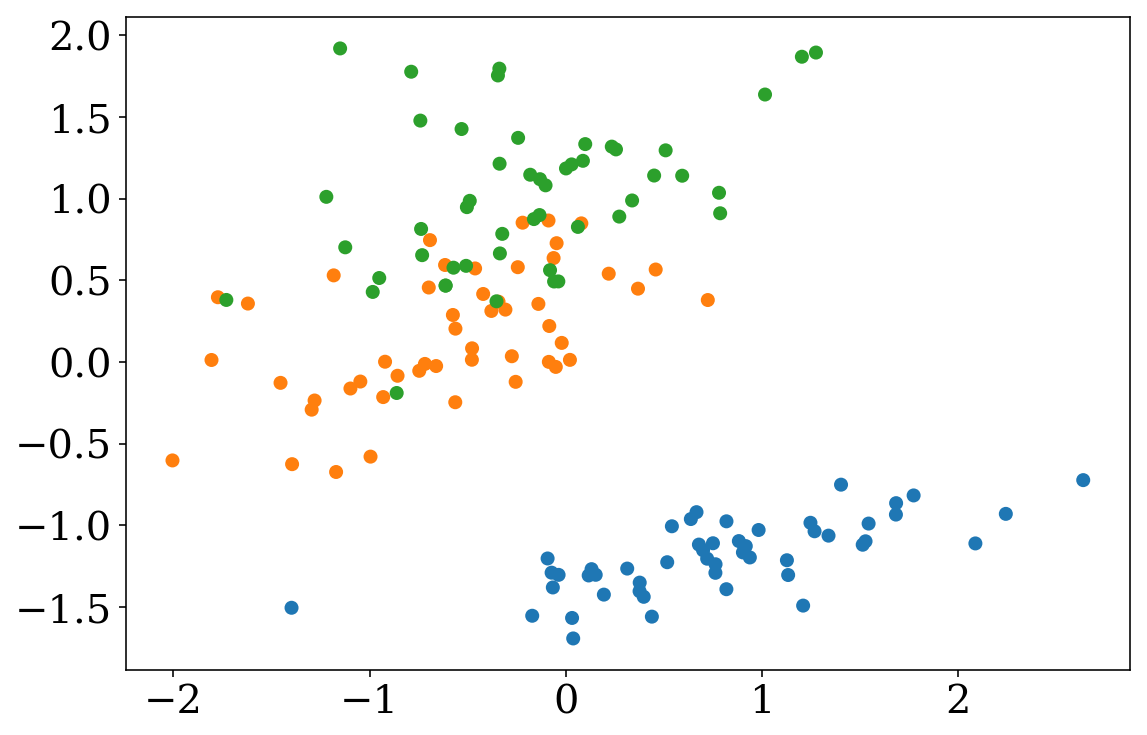

In [6]:
k = 2


m,n = A.shape
# A = np.random.randn(m, n)
Xp = cp.Parameter((m,k))
Yp = cp.Parameter((k,n))

Xv = cp.Variable((m,k))
Yv = cp.Variable((k,n))
X0 = np.random.rand(m,k)



#Random Intialization 
Xv.value = np.random.rand(m,k)
Xp.value = np.random.rand(m,k)

Yp.value = np.random.rand(k,n)
Yv.value = np.random.rand(k,n)

objX = cp.Minimize(cp.sum_squares(A-Xv@Yp))
probX = cp.Problem(objX)
objY = cp.Minimize(cp.sum_squares(A-Xp@Yv))
probY = cp.Problem(objY)

niter = 2
for i in range(niter):
    print(i)
    
    # do X
    probX.solve(verbose=False)
    Xp.value = Xv.value

    # do Y
    probY.solve()
    Yp.value = Yv.value
print("done")

X = Xp.value
plt.scatter(X[:,0],X[:,1],color=cols)

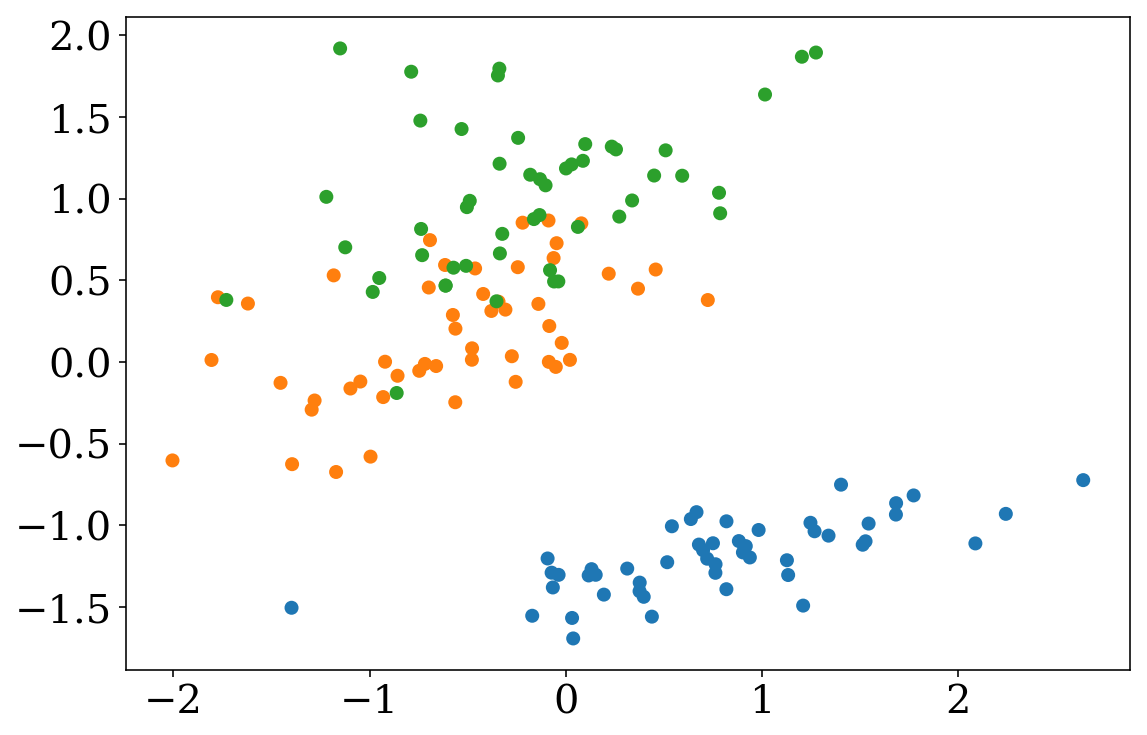

In [7]:
X = Xp.value
plt.scatter(X[:,0],X[:,1],color=cols)

## Works great. Now regularized PCA

But the Y problem sometimes hangs if i don't pass it max_iters???? - this was true when i was using LinearReg  instead of QuadraticReg


up to 

In [8]:
k = 2

#define a regularizer
# use one for X and one for Y for generality

regX = QuadraticReg(nu=.1)
regY = QuadraticReg(nu=.1)
#Reinitialize 
Xv.value = np.random.rand(m,k)
Xp.value = np.random.rand(m,k)

Yp.value = np.random.rand(k,n)
Yv.value = np.random.rand(k,n)


objX = cp.Minimize(cp.sum_squares(A-Xv@Yp)+regX(Xv))
probX = cp.Problem(objX)

objY = cp.Minimize(cp.sum_squares(A-Xp@Yv)+regY(Yv))
probY = cp.Problem(objY)

niter = 7
max_iter = 1000
for i in range(niter):
    print(i)
    
    # do X
 
    probX.solve(verbose=False)

    Xp.value = Xv.value
    # do Y
    print('here')
    probY.solve(verbose=False)
    Yp.value = Yv.value
print("done")

0
here
1
here
2
here
3
here
4
here
5
here
6
here
done


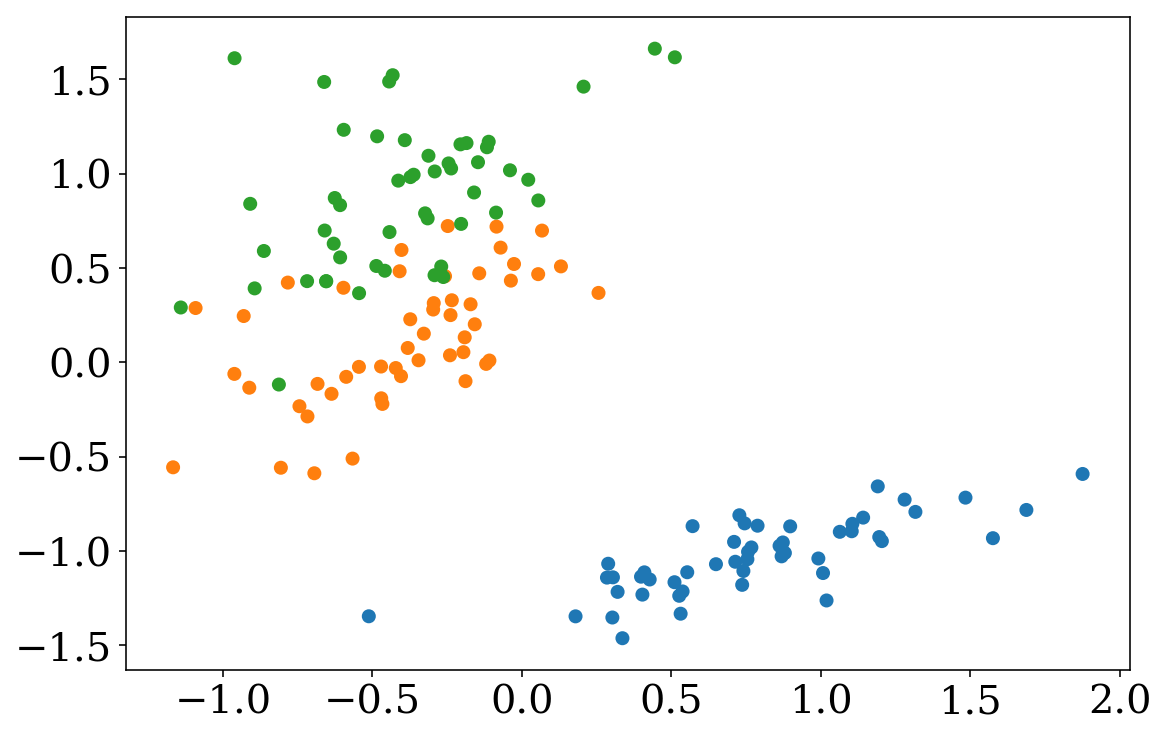

In [9]:
X = Xp.value
plt.scatter(X[:,0],X[:,1],color=cols)

## Now with missing data :O

Can mask away the missing data points at two different times.

1. Calc XY and then don't compare to missing points
2. don't even calculate the missing values

Option 2 is likely more efficient if implemented well but option 1 will be much clearer. I think my confusion with the existing implementation is partially a consequence of their usage of option 2


I did that with masking. But sometimes the imputed value for a point will just be absolutely huge???

This definitely happens more often when I have more than one missing data point in a row. I changed the missing_idx to prevent that in this case.

Could instead be:

`missing_idx =np.random.randint(0.150,size=(n_missing,1))`


In [10]:
n_missing = 50
missing_idx =np.random.choice(np.arange(150),size=(n_missing,1),replace=False)

missing_idx =np.hstack([missing_idx,np.random.randint(0,4,size=(n_missing,1))])
row = missing_idx[:,0]
col = missing_idx[:,1]
mask = np.zeros_like(A)

mask[missing_idx[:,0],missing_idx[:,1]]=1
mask = ~mask.astype(np.bool)


In [11]:
k = 2


m,n = A.shape
# A = np.random.randn(m, n)
Xp = cp.Parameter((m,k))
Yp = cp.Parameter((k,n))

Xv = cp.Variable((m,k))
Yv = cp.Variable((k,n))
X0 = np.random.rand(m,k)



#Random Intialization 
Xv.value = np.random.rand(m,k)
Xp.value = np.random.rand(m,k)

Yp.value = np.random.rand(k,n)
Yv.value = np.random.rand(k,n)

niter = 20


for i in range(niter):
#     print(i)
    # do X
    objX = cp.Minimize(cp.sum_squares((A-Xv@Yp)[mask]))
    probX = cp.Problem(objX)
    probX.solve(verbose=False)

    Xp.value = Xv.value
#     Yp = np.random.rand(k,n)
    # do Y
    objY = cp.Minimize(cp.sum_squares((A-Xp@Yv)[mask]))
    probY = cp.Problem(objY)
    probY.solve()
    Yp.value = Yv.value
print("done")

done


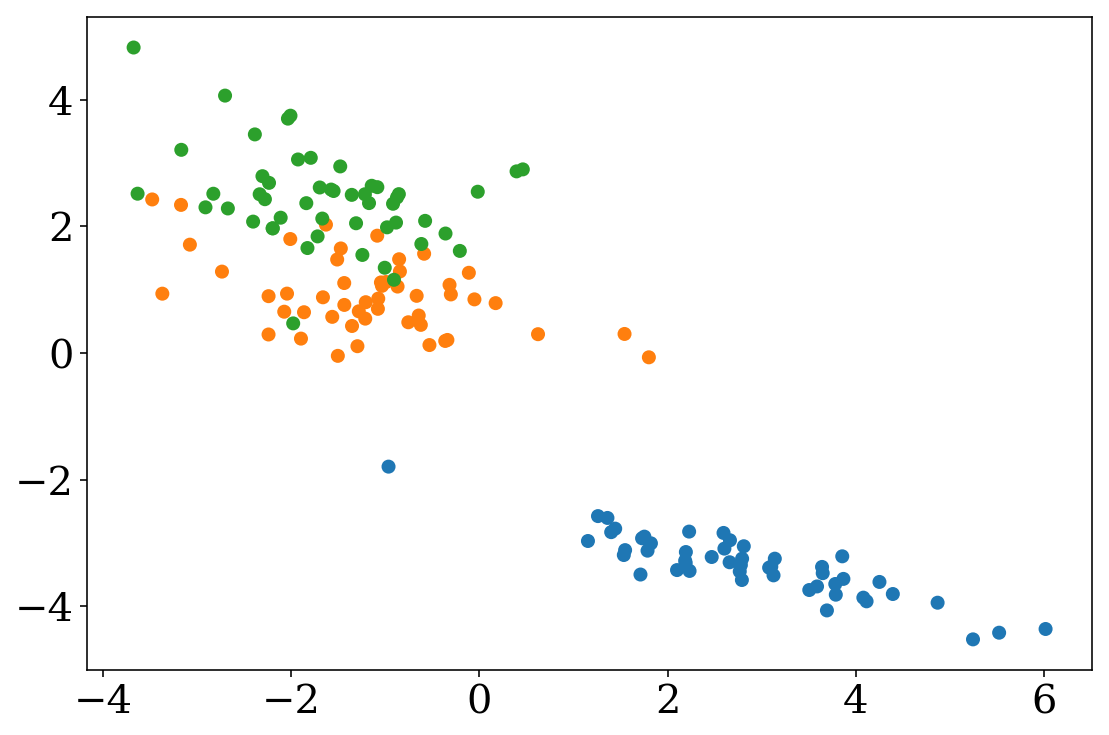

In [12]:
X = Xp.value
plt.scatter(X[:,0],X[:,1],color=cols)


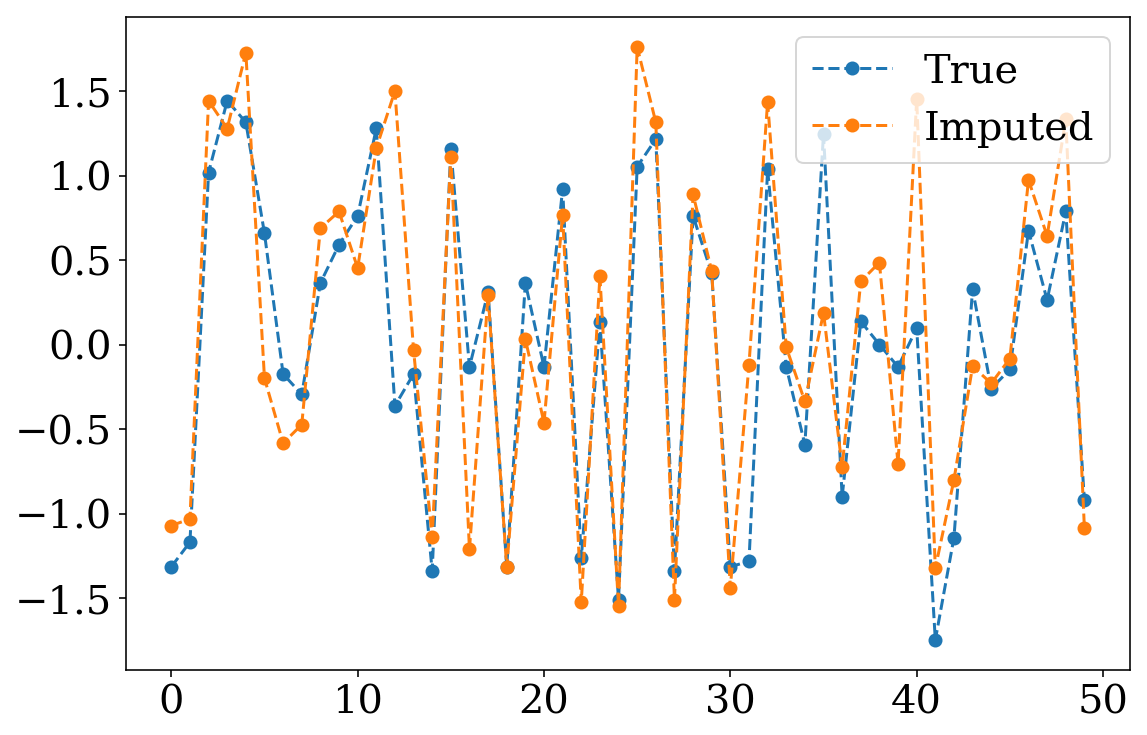

In [13]:
plt.plot(A[row,col],'o--',label='True')
plt.plot((Xp@Yp).value[row,col],'o--',label='Imputed')
plt.legend()
plt.show()

## Mixed Data + loss function based scaling

I think I'll start easy by making the final column of the data matrix a categorical of the flower class

Plan is to keep a list of columns and the associated loss function. Maybe tuples like:
`[([columns],Loss Function),([columns],Loss Function),....]`  

gotta figure out how to do the loss function normalization. See sections 2.6, 3.3 and 4.4


You can do some wacky stuff with the regularizers adding acolumn of ones to X to create the offset, but its not clear to me why or even if that is a better thing to do than just actually subtracting the offset?

need to modify the loss function to take a mask - or just pass them the masked things

Figure out adding offsets and scaling

 From CVXPY documentioan (https://buildmedia.readthedocs.org/media/pdf/cvxpy/latest/cvxpy.pdf) pg 104:
 
 Indexing and other operations can map 2D expressions down to 1D or 0D expressions.  For example, ifXhasshape(3, 2), thenX[:,0]has shape(3,). CVXPY behavior follows NumPy semantics in all cases, withthe exception that broadcasting only works when one argument is 0D.
 
 
 So broadcasting doesn't totally do :(
 
 need to be careful that when calcualting the mus not setting the other ones to zero. it sems like the solver does this natural. add constraint?

In [44]:
#really should be one vs many loss here
Amix = np.hstack([np.copy(iris.data),iris.target[:,None]])
idx = Amix[:,-1]<1.5
Amix[:,-1][idx] =1
Amix[:,-1][~idx]=-1
mask2  =np.hstack([mask,np.ones([150,1]).astype(np.bool)]) # extra column of missing data

loss_list = [(np.array([0,1,2,3]),QuadraticLoss()),
             (np.array([4]),HingeLoss())]

In [45]:
n_missing = 50
missing_idx =np.random.choice(np.arange(150),size=(n_missing,1),replace=False)

missing_idx =np.hstack([missing_idx,np.random.randint(0,5,size=(n_missing,1))])
row = missing_idx[:,0]
col = missing_idx[:,1]
mask = np.zeros_like(Amix)

mask[missing_idx[:,0],missing_idx[:,1]]=1
mask = ~mask.astype(np.bool)


In [46]:
ones = cp.Constant(np.ones([Amix.shape[0],1]))
mu = cp.Variable((1,Amix.shape[1]))
mu.value = np.array([[1,2,3,4,5]])


arr = ones @ mu

#Calc mu
constraints = []
for columns, loss_fxn in loss_list:
    msk = mask[:,columns] # named weird to not mess with older code above, change when putting into file
    obj = cp.Minimize(loss_fxn(Amix[:,columns][msk],arr[:,columns][msk]))
    prob =cp.Problem(obj,constraints=constraints)
    prob.solve()
    constraints.append(mu[:,columns]==mu[:,columns].value)
    
#calc sigma
sigma = np.zeros(Amix.shape[1])
for i in range(len(loss_list)):
    for j in loss_list[i][0]:
        msk = mask[:,j]
        sigma[j] = loss_list[i][1](Amix[:,j][msk],mu[0,j]).value
nj = mask.sum(axis=0)
sigma /= (nj-1)

### PCA with loss function based scaling

below is a nice example of regularization beign useful

it also shows how useful a convergence object is.

0
1
2
3
4
5
done


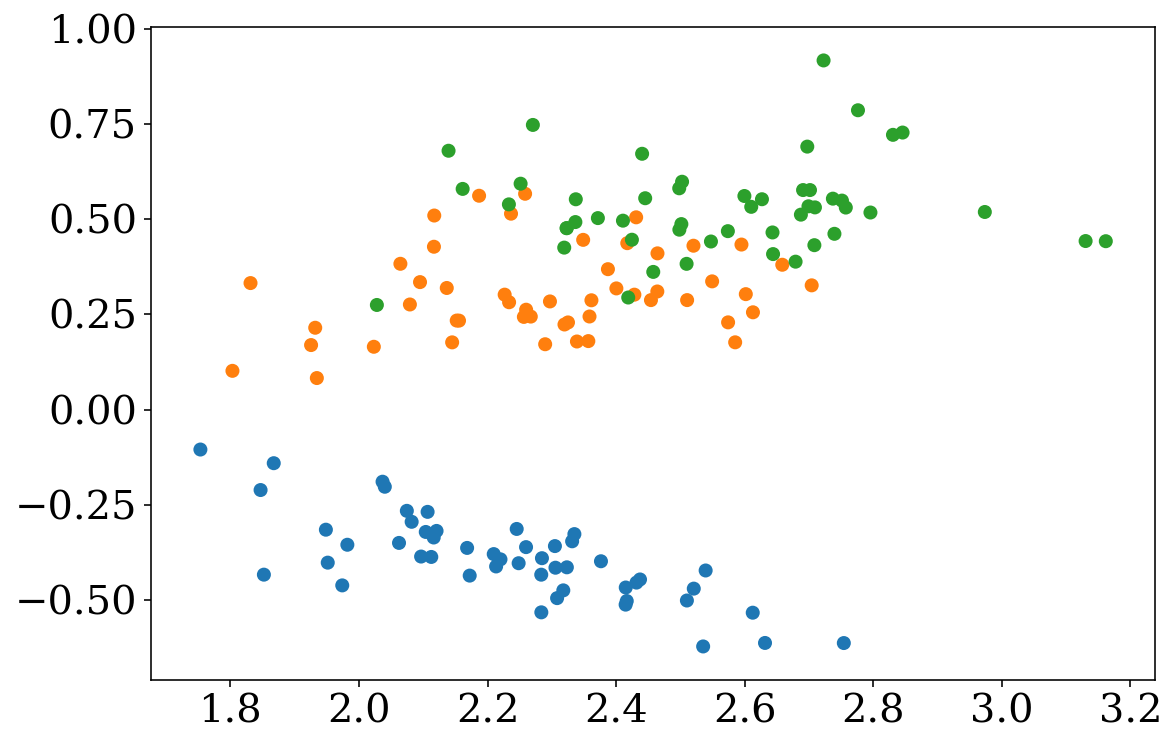

In [47]:
mu_arr= np.ones([150,1]) @ mu
sigma_arr = np.ones([150,1]) @ sigma[None,:]

columns = np.arange(4)

k = 2
m,n = Amix.shape
# A = np.random.randn(m, n)
Xp = cp.Parameter((m,k))
Yp = cp.Parameter((k,n))

Xv = cp.Variable((m,k))
Yv = cp.Variable((k,n))
X0 = np.random.rand(m,k)



#Random Intialization 
Xv.value = np.random.rand(m,k)
Xp.value = np.random.rand(m,k)

Yp.value = np.random.rand(k,n)
Yv.value = np.random.rand(k,n)
Qloss = QuadraticLoss()

Qreg = QuadraticReg()
scaled_Qloss = Qloss.scaled_loss
niter = 6
for i in range(niter):
    print(i)
    # could have a loop over loss-list here
    # do X
    objX = cp.Minimize(scaled_Qloss(Amix[:,columns],(Xv@Yp)[:,columns],sigma_arr[:,columns],mask2[:,columns])+Qreg(Xv))
    probX = cp.Problem(objX)
    probX.solve(verbose=False)

    Xp.value = Xv.value

    # do Y
    objY = cp.Minimize(scaled_Qloss(Amix[:,columns],(Xp@Yv)[:,columns],sigma_arr[:,columns],mask2[:,columns]))
    probY = cp.Problem(objY)
    probY.solve()
    Yp.value = Yv.value
print("done")

X = Xp.value
plt.scatter(X[:,0],X[:,1],color=cols)

Figuring out scaling of hinge loss

In [48]:
mask = np.copy(mask2)
a = 1
pred = Xv @ Yp
pred = pred.value
pred = np.random.choice([-1,1],size=(150,4),p=[.2,.8])
columns = np.array([-1])
msk = np.random.choice([0,1],size=[150,1],p=[.3,.7]).astype(np.bool)
cp.sum((cp.pos(np.ones(Amix.shape)[:,columns][msk]
       -cp.multiply(Amix[:,columns][msk], pred[:,columns][msk]))/sigma_arr[:,columns][msk]).value).value

124.24999999999999

In [49]:
hl= HingeLoss()

hl.scaled_loss(Amix[:,columns],pred[:,columns],sigma_arr[:,columns],msk).value

124.24999999999999

## PCA with mixed data types

done


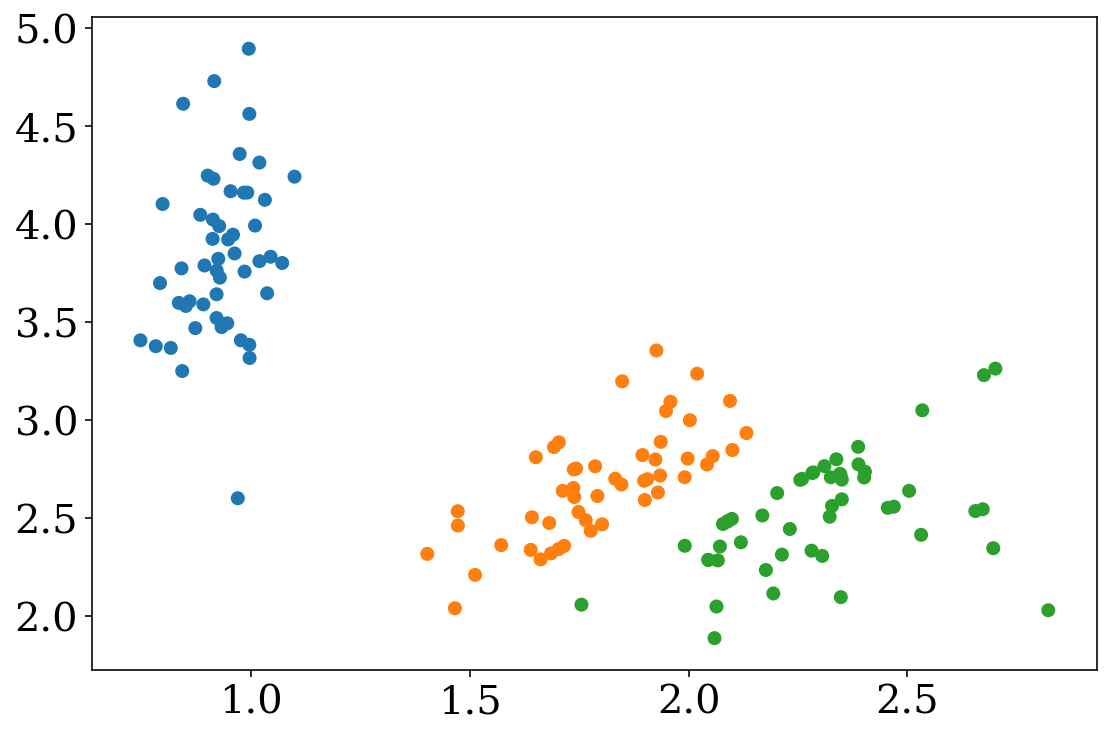

In [50]:
loss_list = [(np.arange(4),QuadraticLoss()),
             (np.array([-1]), HingeLoss())]

mask = np.copy(mask2)
mu_arr= np.ones([150,1]) @ mu
sigma_arr = np.ones([150,1]) @ sigma[None,:]

columns = np.arange(4)

k = 2
m,n = Amix.shape
# A = np.random.randn(m, n)
Xp = cp.Parameter((m,k))
Yp = cp.Parameter((k,n))

Xv = cp.Variable((m,k))
Yv = cp.Variable((k,n))
X0 = np.random.rand(m,k)



#Random Intialization 
Xv.value = np.random.rand(m,k)
Xp.value = np.random.rand(m,k)

Yp.value = np.random.rand(k,n)
Yv.value = np.random.rand(k,n)
Qloss = QuadraticLoss()

Qreg = QuadraticReg()
scaled_Qloss = Qloss.scaled_loss
niter = 6
objX = cp.Constant(0)
objY = cp.Constant(0)

#define objectives
for columns, loss_fxn in loss_list:
    objX += loss_fxn.scaled_loss(Amix[:,columns],(Xv@Yp)[:,columns],sigma_arr[:,columns],mask[:,columns])       
    objY += loss_fxn.scaled_loss(Amix[:,columns],(Xp@Yv)[:,columns],sigma_arr[:,columns],mask[:,columns])
if regX is not None:
    objX += Qreg(Xv)
if regY is not None:
    objY += regY(Yv)
objX = cp.Minimize(objX)
objY = cp.Minimize(objY)
probX = cp.Problem(objX)

probY = cp.Problem(objY)
losses = []
niter = 100
for i in range(niter):
#     print(i)
    # could have a loop over loss-list here
    # do X
    
    losses.append(probX.solve(verbose=False))

    Xp.value = Xv.value

    # do Y

    
    losses.append(probY.solve())
    Yp.value = Yv.value
print("done")

X = Xp.value
Y = Yp.value
Z = X @ Y
plt.scatter(X[:,0],X[:,1],color=cols)

(25, 30)

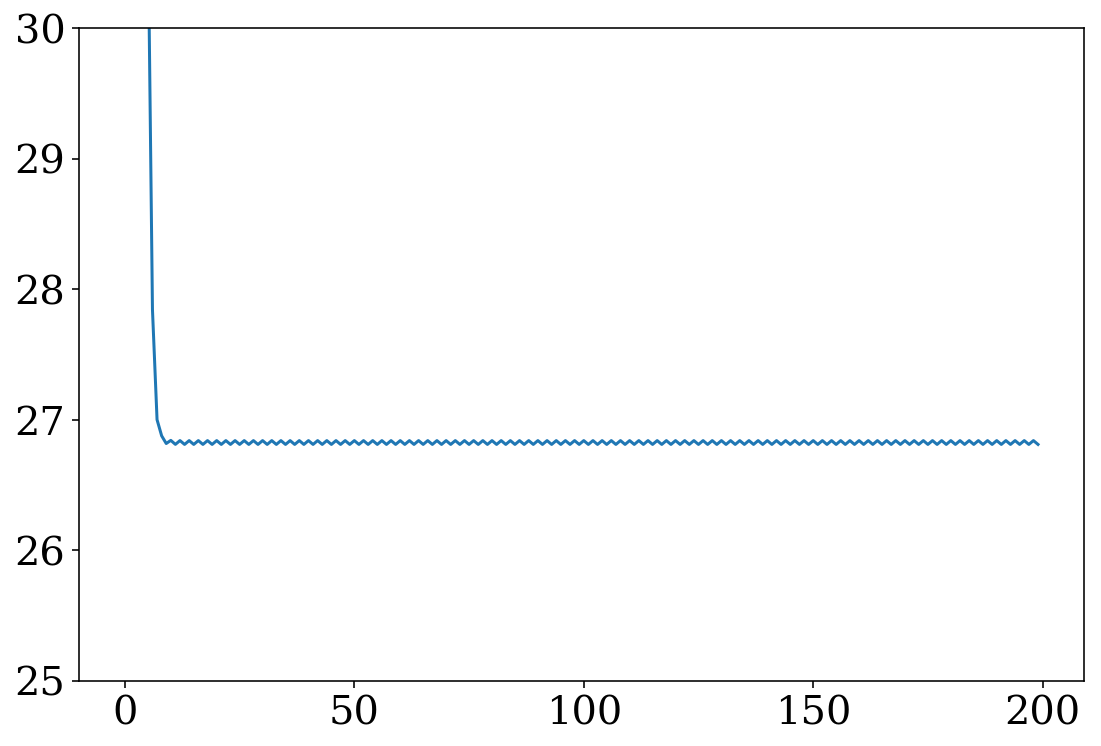

In [40]:
plt.plot(losses)
plt.ylim([25,30])

In [43]:
Y

array([[ 0.56952587, -0.52329612,  2.06508956,  0.88265503,  4.88542162],
       [ 1.44420334,  0.78819138,  0.87362864,  0.27313132,  0.01617371]])